In [1]:
import operator
import re

import numpy as np
import pandas as pd

import nltk 
from nltk.stem import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
file = open('./health.txt', 'r', encoding = "utf8",)

lines = file.readlines()

file.close()

In [4]:
tweets = []

for line in lines:
    
    attributes = line.split('|', 2)
    
    tweets.append(attributes[2])
    
tweets.pop(0)
tweets

['An abundance of online info can turn us into e-hypochondriacs. Or, worse, lead us to neglect getting the care we need\n',
 'A plant-based diet that incorporates fish may be the key to preventing colorectal cancers:\n',
 "It doesn't take much to damage your hearing at a sports bar or nightclub. That's why a billion people are at risk.\n",
 'RT @CNN: Forever young? Discover this island’s secrets to longevity on #TheWonderList w/ @BillWeirCNN \n',
 'RT @CNN: Is post-traumatic stress disorder in your genes? A simple blood test may one day help tell you\n',
 'Maysoon Zayid, a touring standup comic with Cerebral Palsy, has a message to share.\n',
 "How women can wipe out Alzheimer's, from @mariashriver. \n",
 'RT @CNNOpinion: Women can defeat #Alzheimers, says @mariashriver. #WipeOutAlz challenge will make it happen.\n',
 'Is it time to raise the legal smoking age?\n',
 'CDC: Misuse of garments may have led to release of bioterror bacteria at Tulane monkey lab.\n',
 "Losing a brain tumor, 

In [5]:
processed_tweets = []

for tweet in tweets:
    
    processed_tweet = re.sub('^RT\:', '', tweet)
    processed_tweet = re.sub('^RT', '', processed_tweet)
    processed_tweet = re.sub('RT\:', '', processed_tweet)
    processed_tweet = re.sub('\bRT\b', '', processed_tweet) 
    
    processed_tweet = re.sub('\.\@\w+\:', '', processed_tweet)
    processed_tweet = re.sub('\.\@\w+', '', processed_tweet)
    processed_tweet = re.sub('\@\w+\: ', '', processed_tweet)
    processed_tweet = re.sub('\@\w+', '', processed_tweet) 
    
    processed_tweet = re.sub('\&\w+\;', '', processed_tweet)
    
    processed_tweet = re.sub('[^a-zA-Z0-9 ]', '', processed_tweet)
    
    processed_tweet = re.sub('\s+', ' ', processed_tweet)
    
    processed_tweet = re.sub('\b\w{1}\b', '', processed_tweet)
    
    processed_tweet = processed_tweet.lower()
    processed_tweet = processed_tweet.strip()
    
    processed_tweets.append(processed_tweet)

processed_tweets

['an abundance of online info can turn us into ehypochondriacs or worse lead us to neglect getting the care we need',
 'a plantbased diet that incorporates fish may be the key to preventing colorectal cancers',
 'it doesnt take much to damage your hearing at a sports bar or nightclub thats why a billion people are at risk',
 'forever young discover this islands secrets to longevity on thewonderlist w',
 'is posttraumatic stress disorder in your genes a simple blood test may one day help tell you',
 'maysoon zayid a touring standup comic with cerebral palsy has a message to share',
 'how women can wipe out alzheimers from',
 'women can defeat alzheimers says wipeoutalz challenge will make it happen',
 'is it time to raise the legal smoking age',
 'cdc misuse of garments may have led to release of bioterror bacteria at tulane monkey lab',
 'losing a brain tumor gaining perspective cnns jessica moskowitzs firstperson experience',
 'you may be your germs microbe genes slipped into human dn

In [6]:
english_stopwords = stopwords.words('english')
english_stemmer = SnowballStemmer('english', ignore_stopwords=True)

final_tweets = []

for processed_tweet in processed_tweets:
    
    tokens = processed_tweet.split(' ')
    
    words = []
    
    for token in tokens:
        
        if (token not in english_stopwords):
            word = token
            #word = english_stemmer.stem(token)
            words.append(word.strip())
            
    final_tweets.append(' '.join(words))
    
final_tweets

['abundance online info turn us ehypochondriacs worse lead us neglect getting care need',
 'plantbased diet incorporates fish may key preventing colorectal cancers',
 'doesnt take much damage hearing sports bar nightclub thats billion people risk',
 'forever young discover islands secrets longevity thewonderlist w',
 'posttraumatic stress disorder genes simple blood test may one day help tell',
 'maysoon zayid touring standup comic cerebral palsy message share',
 'women wipe alzheimers',
 'women defeat alzheimers says wipeoutalz challenge make happen',
 'time raise legal smoking age',
 'cdc misuse garments may led release bioterror bacteria tulane monkey lab',
 'losing brain tumor gaining perspective cnns jessica moskowitzs firstperson experience',
 'may germs microbe genes slipped human dna study says',
 'plantbased diet incorporates fish may key preventing colorectal cancers',
 'fitnation finding right life balance family work getting fit',
 'robert downey jr presents child iron man 

In [7]:
words = " ".join(final_tweets).split(" ")

counter = {}

for word in words:
 
    if (word in counter):
        counter[word] = counter[word] + 1
    else:
        counter[word] = 1
        
counter = sorted(counter.items(), key = operator.itemgetter(1), reverse = True)

counter

[('video', 840),
 ('healthtalk', 811),
 ('health', 716),
 ('ebola', 613),
 ('may', 613),
 ('cancer', 568),
 ('new', 511),
 ('us', 433),
 ('says', 376),
 ('study', 357),
 ('help', 350),
 ('nhs', 348),
 ('heart', 313),
 ('get', 305),
 ('risk', 304),
 ('foods', 297),
 ('weight', 273),
 ('healthy', 269),
 ('life', 266),
 ('could', 247),
 ('care', 242),
 ('brain', 241),
 ('10', 241),
 ('kids', 239),
 ('one', 231),
 ('food', 222),
 ('patients', 219),
 ('ways', 217),
 ('hospital', 217),
 ('day', 213),
 ('disease', 211),
 ('know', 210),
 ('eat', 204),
 ('diet', 202),
 ('make', 202),
 ('drug', 191),
 ('5', 189),
 ('better', 186),
 ('flu', 184),
 ('todays', 183),
 ('people', 180),
 ('w', 180),
 ('getfit', 180),
 ('eating', 179),
 ('time', 178),
 ('say', 177),
 ('dont', 174),
 ('need', 170),
 ('good', 168),
 ('best', 168),
 ('today', 166),
 ('mental', 166),
 ('love', 161),
 ('audio', 160),
 ('women', 160),
 ('doctors', 158),
 ('like', 157),
 ('tip', 157),
 ('diabetes', 154),
 ('fat', 154),
 ('joi

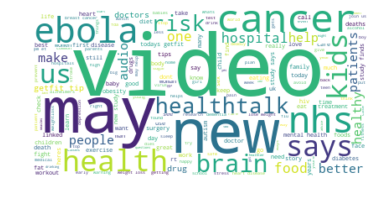

In [8]:
text = '\n'.join(final_tweets)

wc = WordCloud(background_color="white", 
               max_words = 200,
               normalize_plurals = False)

result = wc.generate(text)

plt.imshow(result, interpolation='bilinear')
plt.axis("off")
plt.show()